In [94]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance_matrix
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import pickle

In [95]:
data = pd.read_csv("all_songs_audio.csv", index_col=0)

In [96]:
data.reset_index()


,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist_name
0,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,...,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,flowers,miley cyrus
1,3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,...,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,snooze,sza
2,2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,...,97.950,audio_features,2dHHgzDwk4BJdRwy9uXhTO,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4,creepin',"metro boomin, the weeknd & 21 savage"
3,0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,...,97.008,audio_features,0V3wPSX9ygBnCm8psDIegu,spotify:track:0V3wPSX9ygBnCm8psDIegu,https://api.spotify.com/v1/tracks/0V3wPSX9ygBn...,https://api.spotify.com/v1/audio-analysis/0V3w...,200690,4,anti-hero,taylor swift
4,3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,...,131.121,audio_features,3nqQXoyQOWXiESFLlDF1hG,spotify:track:3nqQXoyQOWXiESFLlDF1hG,https://api.spotify.com/v1/tracks/3nqQXoyQOWXi...,https://api.spotify.com/v1/audio-analysis/3nqQ...,156943,4,unholy,sam smith & kim petras
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2326,2L21CMOOqvrimKXqLIpTuX,0.842,0.681,8,-6.022,1,0.0492,0.7550,0.000062,0.2830,...,91.958,audio_features,2L21CMOOqvrimKXqLIpTuX,spotify:track:2L21CMOOqvrimKXqLIpTuX,https://api.spotify.com/v1/tracks/2L21CMOOqvri...,https://api.spotify.com/v1/audio-analysis/2L21...,226440,4,thiên đàng,"wowy, jolipoli"
2327,0nYiryEA1YyZWpbIxKtStQ,0.743,0.666,0,-5.466,0,0.0581,0.3080,0.000000,0.1140,...,149.901,audio_features,0nYiryEA1YyZWpbIxKtStQ,spotify:track:0nYiryEA1YyZWpbIxKtStQ,https://api.spotify.com/v1/tracks/0nYiryEA1YyZ...,https://api.spotify.com/v1/audio-analysis/0nYi...,205359,4,vitesse,"landy, hornet la frappe"
2328,1vFWBHNjJAPoeWcBOJk9Gp,0.658,0.742,8,-6.170,1,0.1200,0.0434,0.000000,0.2460,...,171.939,audio_features,1vFWBHNjJAPoeWcBOJk9Gp,spotify:track:1vFWBHNjJAPoeWcBOJk9Gp,https://api.spotify.com/v1/tracks/1vFWBHNjJAPo...,https://api.spotify.com/v1/audio-analysis/1vFW...,191263,4,non ti dico no,"boomdabash, loredana bertè"
2329,0KRAQpoakCf6ngwMTZIwfJ,0.547,0.800,5,-3.133,1,0.0345,0.0172,0.806000,0.1420,...,157.081,audio_features,0KRAQpoakCf6ngwMTZIwfJ,spotify:track:0KRAQpoakCf6ngwMTZIwfJ,https://api.spotify.com/v1/tracks/0KRAQpoakCf6...,https://api.spotify.com/v1/audio-analysis/0KRA...,132441,4,selamanya,usop


In [97]:
data.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'song_name', 'artist_name'],
      dtype='object')

In [98]:
X=data.loc[:,['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

In [99]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943
...,...,...,...,...,...,...,...,...,...,...,...,...
2L21CMOOqvrimKXqLIpTuX,0.842,0.681,8,-6.022,1,0.0492,0.7550,0.000062,0.2830,0.602,91.958,226440
0nYiryEA1YyZWpbIxKtStQ,0.743,0.666,0,-5.466,0,0.0581,0.3080,0.000000,0.1140,0.691,149.901,205359
1vFWBHNjJAPoeWcBOJk9Gp,0.658,0.742,8,-6.170,1,0.1200,0.0434,0.000000,0.2460,0.798,171.939,191263
0KRAQpoakCf6ngwMTZIwfJ,0.547,0.800,5,-3.133,1,0.0345,0.0172,0.806000,0.1420,0.307,157.081,132441


In [100]:
X.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000,2331.000000
mean,0.671808,0.636660,5.359073,-6.702909,0.569713,0.104848,0.273163,0.035487,0.170636,0.529844,121.351363,208144.457743
std,0.147661,0.183098,3.672801,3.547318,0.495223,0.099514,0.258840,0.156057,0.130185,0.232286,29.217572,51703.931744
min,0.069700,0.000707,0.000000,-37.406000,0.000000,0.024100,0.000019,0.000000,0.021500,0.000010,57.654000,58149.000000
25%,0.584000,0.528000,2.000000,-7.905000,0.000000,0.040000,0.061150,0.000000,0.094650,0.344000,97.951500,179040.000000
50%,0.694000,0.658000,6.000000,-5.982000,1.000000,0.061600,0.187000,0.000000,0.121000,0.534000,120.012000,202685.000000
75%,0.775000,0.774000,9.000000,-4.615000,1.000000,0.127000,0.417000,0.000051,0.200000,0.714000,140.022000,229633.500000
max,0.980000,1.000000,11.000000,1.257000,1.000000,0.874000,0.995000,0.960000,0.959000,0.982000,220.099000,670667.000000


In [101]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690
3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.238380,0.242218,-1.459437,0.670484,0.869063,-0.382418,-0.811343,-0.227413,-1.063607,0.500161,-0.114763,-0.148753
1,-0.188365,0.498965,0.719204,0.268686,0.869063,-0.701035,-0.845735,0.855728,-0.074033,-0.429925,-1.107734,-1.048452
2,0.292570,-0.091008,-1.187107,0.196785,-1.150664,-0.567357,0.555816,-0.227446,-0.679455,-1.540860,-0.801106,0.258750
3,-0.235781,0.034634,-0.370117,0.037194,0.869063,-0.532178,-0.553214,-0.227434,-0.220010,0.013589,-0.833354,-0.144207
4,0.285797,-0.899490,-0.914777,-0.189505,0.869063,-0.185418,-1.005327,-0.227417,0.732685,-1.256668,0.334447,-0.990494


In [102]:
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_scaled_df)

KMeans(random_state=0)

In [103]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index() # Number of songs in each cluster

0    428
1    318
2    142
3    660
4    265
5    437
6     53
7     28
dtype: int64

In [104]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,5
3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947,0
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,3
0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690,5
3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,5


In [105]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.641869,0.707269,7.728972,-5.327243,9.906542e-01,0.077629,0.171653,0.005058,0.149202,0.527717,133.157752,215829.329439
1,0.537715,0.384568,4.984277,-9.757028,7.232704e-01,0.054424,0.629454,0.016449,0.140841,0.339830,115.682104,226323.647799
2,0.630387,0.705901,5.140845,-6.172676,5.422535e-01,0.108280,0.266290,0.006458,0.541599,0.581502,117.367958,218926.359155
3,0.711397,0.701588,6.021212,-5.685285,1.110223e-16,0.079033,0.195865,0.008782,0.147648,0.581126,121.194771,204606.745455
4,0.754464,0.594264,5.852830,-7.436068,4.037736e-01,0.321411,0.260389,0.002723,0.138842,0.512662,124.803823,192934.064151
5,0.727506,0.695751,2.102975,-5.587442,1.000000e+00,0.082721,0.201125,0.003802,0.149670,0.625159,114.231538,201985.077803
6,0.640132,0.597642,5.132075,-8.843925,6.603774e-01,0.067526,0.245476,0.792679,0.173457,0.411366,124.028358,179732.716981
7,0.337654,0.091661,5.464286,-26.138607,6.428571e-01,0.051014,0.932893,0.864857,0.119979,0.148914,102.539357,206786.535714


In [ ]:
#Changing Parameters

In [106]:
kmeans.inertia_

16470.799485624906

In [107]:
kmeans2 = KMeans(n_clusters=8, 
                init="random",
                n_init=3, 
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=0)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

16530.414205603836


Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 36349.40350907827
Iteration 1, inertia 26290.896783041397
Iteration 2, inertia 26098.90147359218
Iteration 3, inertia 25644.6722734999
Iteration 4, inertia 24965.82820978853
Iteration 5, inertia 24472.97217717737
Iteration 6, inertia 24280.71023516639
Iteration 7, inertia 24183.4952989039
Iteration 8, inertia 24141.32601260654
Iteration 9, inertia 24122.191625239706
Iteration 10, inertia 24114.981460491563
Iteration 11, inertia 24111.501752909637
Iteration 12, inertia 24108.522714989325
Iteration 13, inertia 24105.028602108512
Iteration 14, inertia 24102.119492909766
Iteration 15, inertia 24101.316787310283
Iteration 16, inertia 24100.544014576706
Iteration 17, inertia 24100.097757070675
Iteration 18, inertia 24099.501088558318
Iteration 19, inertia 24099.146389372
Iteration 20, inertia 24098.145432074398
Iteration 21, inertia 24097.175110200922
Iteration 22, inertia 24096.57606191789
Iteration 23,

Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 29319.173871012717
Iteration 1, inertia 24196.46278894663
Iteration 2, inertia 23492.00726312793
Iteration 3, inertia 23011.7456400605
Iteration 4, inertia 22767.34439689327
Iteration 5, inertia 22620.909556414405
Iteration 6, inertia 22376.749764931985
Iteration 7, inertia 22099.12418941578
Iteration 8, inertia 22074.827161708254
Iteration 9, inertia 22066.36590289655
Iteration 10, inertia 22062.40185512766
Iteration 11, inertia 22060.05547311649
Iteration 12, inertia 22059.744628437
Iteration 13, inertia 22059.51952827874
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 34827.36906442861
Iteration 1, inertia 24289.91786518237
Iteration 2, inertia 23189.507477167936
Iteration 3, inertia 22735.906552205728
Iteration 4, inertia 22603.06863664269
Iteration 5, inertia 22553.380867414366
Iteration 6, inertia 22522.095690355243
Iteration 7, inertia 22496.151973

Training a K-Means model with 4 clusters! 

Initialization complete
Iteration 0, inertia 27339.954092913995
Iteration 1, inertia 21734.104243240738
Iteration 2, inertia 21478.576263578463
Iteration 3, inertia 21381.907981731812
Iteration 4, inertia 21285.159770430393
Iteration 5, inertia 21214.058200549654
Iteration 6, inertia 21169.24871775306
Iteration 7, inertia 21101.705058988773
Iteration 8, inertia 21067.362837783217
Iteration 9, inertia 21042.647717595006
Iteration 10, inertia 21029.202163855614
Iteration 11, inertia 21019.83592283493
Iteration 12, inertia 21017.040293437367
Iteration 13, inertia 21014.47199115977
Iteration 14, inertia 21011.111713987622
Iteration 15, inertia 21007.554887916216
Iteration 16, inertia 21002.23215139805
Iteration 17, inertia 21000.13174038465
Iteration 18, inertia 20999.172074155667
Iteration 19, inertia 20998.902737600758
Iteration 20, inertia 20998.60275644844
Iteration 21, inertia 20998.50729047254
Iteration 22, inertia 20998.46997126108
Converg

Iteration 6, inertia 20492.040878803302
Iteration 7, inertia 20469.77999564562
Iteration 8, inertia 20437.451728310938
Iteration 9, inertia 20409.77525697108
Iteration 10, inertia 20357.812557765265
Iteration 11, inertia 20299.121950463144
Iteration 12, inertia 20233.399655067802
Iteration 13, inertia 20211.989236450092
Iteration 14, inertia 20209.283638361434
Iteration 15, inertia 20208.7859943374
Iteration 16, inertia 20208.37576280565
Iteration 17, inertia 20207.228863599477
Iteration 18, inertia 20206.934081767962
Converged at iteration 18: strict convergence.
Initialization complete
Iteration 0, inertia 26891.13456090256
Iteration 1, inertia 22360.561358495434
Iteration 2, inertia 21728.156099154436
Iteration 3, inertia 21484.10903459786
Iteration 4, inertia 21320.818063437095
Iteration 5, inertia 21239.777657444065
Iteration 6, inertia 21211.51033603589
Iteration 7, inertia 21203.035499469224
Iteration 8, inertia 21199.456398504735
Iteration 9, inertia 21198.532835589267
Iteratio

Iteration 66, inertia 18913.73056127475
Converged at iteration 66: center shift 9.622630481212963e-05 within tolerance 0.00010000000000000036.
Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 24867.03414215181
Iteration 1, inertia 19422.811588917313
Iteration 2, inertia 19172.13023427985
Iteration 3, inertia 19014.75785475758
Iteration 4, inertia 18870.104696367132
Iteration 5, inertia 18778.770577096846
Iteration 6, inertia 18718.088704800226
Iteration 7, inertia 18647.95397883562
Iteration 8, inertia 18531.75790140286
Iteration 9, inertia 18368.68317607606
Iteration 10, inertia 18212.844073421646
Iteration 11, inertia 18130.695425956303
Iteration 12, inertia 18098.449618949468
Iteration 13, inertia 18087.301398049574
Iteration 14, inertia 18084.19970087288
Iteration 15, inertia 18081.557261138012
Iteration 16, inertia 18079.78327566802
Iteration 17, inertia 18078.97538114102
Iteration 18, inertia 18078.16132192086
Iteration 19, inertia 18077.89

Iteration 0, inertia 23986.665561260714
Iteration 1, inertia 19383.616089457813
Iteration 2, inertia 18872.15545106714
Iteration 3, inertia 18661.062846925255
Iteration 4, inertia 18462.963475220356
Iteration 5, inertia 18151.609208011934
Iteration 6, inertia 17687.274097122972
Iteration 7, inertia 17497.51337682009
Iteration 8, inertia 17467.438098985505
Iteration 9, inertia 17455.123902402316
Iteration 10, inertia 17445.657631468832
Iteration 11, inertia 17436.798079956363
Iteration 12, inertia 17430.11744598228
Iteration 13, inertia 17420.307385774708
Iteration 14, inertia 17407.425376099305
Iteration 15, inertia 17395.321984367827
Iteration 16, inertia 17375.060187114454
Iteration 17, inertia 17350.807578745924
Iteration 18, inertia 17325.907474897253
Iteration 19, inertia 17279.210391934146
Iteration 20, inertia 17235.050350446152
Iteration 21, inertia 17212.270156465558
Iteration 22, inertia 17190.46043171372
Iteration 23, inertia 17177.064815963793
Iteration 24, inertia 17167.02

Iteration 1, inertia 18075.897409073244
Iteration 2, inertia 17093.06096157156
Iteration 3, inertia 16862.483621115265
Iteration 4, inertia 16757.27528437035
Iteration 5, inertia 16699.902090982465
Iteration 6, inertia 16672.848706572615
Iteration 7, inertia 16656.41922607739
Iteration 8, inertia 16650.33119983671
Iteration 9, inertia 16646.71788879685
Iteration 10, inertia 16640.382535825825
Iteration 11, inertia 16631.19837331629
Iteration 12, inertia 16624.41192148705
Iteration 13, inertia 16617.26587936675
Iteration 14, inertia 16612.658972694273
Iteration 15, inertia 16610.365824904664
Iteration 16, inertia 16609.405218598702
Iteration 17, inertia 16608.831285911725
Iteration 18, inertia 16607.741489379954
Iteration 19, inertia 16607.20023899965
Iteration 20, inertia 16606.929374068026
Iteration 21, inertia 16606.819526924904
Iteration 22, inertia 16606.762548654697
Converged at iteration 22: strict convergence.
Initialization complete
Iteration 0, inertia 22139.236863870847
Itera

Iteration 17, inertia 15776.379804050994
Iteration 18, inertia 15775.699246689572
Iteration 19, inertia 15775.202883148588
Iteration 20, inertia 15774.851522586618
Iteration 21, inertia 15774.549956654391
Iteration 22, inertia 15774.235511405073
Iteration 23, inertia 15773.615319206692
Iteration 24, inertia 15773.498655880001
Iteration 25, inertia 15773.286831325528
Iteration 26, inertia 15773.087286405145
Iteration 27, inertia 15773.040354563145
Converged at iteration 27: strict convergence.
Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 21366.501833472576
Iteration 1, inertia 17358.263653590595
Iteration 2, inertia 16859.831857399404
Iteration 3, inertia 16578.274605970917
Iteration 4, inertia 16299.024739590765
Iteration 5, inertia 16055.194389608358
Iteration 6, inertia 15863.153481621708
Iteration 7, inertia 15726.967871204208
Iteration 8, inertia 15679.414232384599
Iteration 9, inertia 15652.035866681908
Iteration 10, inertia 15635.41038

Iteration 25, inertia 15419.936657534756
Iteration 26, inertia 15417.424698363648
Iteration 27, inertia 15414.407005044308
Iteration 28, inertia 15409.17928100561
Iteration 29, inertia 15399.962442322729
Iteration 30, inertia 15387.04411479546
Iteration 31, inertia 15366.96422736331
Iteration 32, inertia 15339.21999050874
Iteration 33, inertia 15311.692904370682
Iteration 34, inertia 15283.100957452843
Iteration 35, inertia 15269.382587747063
Iteration 36, inertia 15254.82178853539
Iteration 37, inertia 15245.227261416681
Iteration 38, inertia 15237.178913753542
Iteration 39, inertia 15229.302499358753
Iteration 40, inertia 15220.867391786502
Iteration 41, inertia 15215.27598451477
Iteration 42, inertia 15212.362636516147
Iteration 43, inertia 15209.436057992254
Iteration 44, inertia 15208.619484390476
Iteration 45, inertia 15208.309061808457
Iteration 46, inertia 15208.022924089057
Iteration 47, inertia 15207.590642739433
Iteration 48, inertia 15206.733660750113
Iteration 49, inertia 

Iteration 40, inertia 14853.91778788618
Iteration 41, inertia 14851.005169427548
Iteration 42, inertia 14848.571055206252
Iteration 43, inertia 14846.658174198481
Iteration 44, inertia 14845.407368200795
Iteration 45, inertia 14844.299265212096
Iteration 46, inertia 14843.931614929144
Iteration 47, inertia 14843.226423672555
Iteration 48, inertia 14842.629414852454
Iteration 49, inertia 14841.48067045234
Iteration 50, inertia 14840.883721166232
Iteration 51, inertia 14840.66187681074
Iteration 52, inertia 14840.505567028402
Iteration 53, inertia 14840.208685005133
Iteration 54, inertia 14839.989482843794
Iteration 55, inertia 14838.463488874739
Iteration 56, inertia 14836.196132438492
Iteration 57, inertia 14834.873946496435
Iteration 58, inertia 14832.990900411383
Iteration 59, inertia 14831.774740987628
Iteration 60, inertia 14830.328296925745
Iteration 61, inertia 14829.498513994156
Iteration 62, inertia 14829.304443147783
Iteration 63, inertia 14829.239354783003
Converged at iterat

Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 19910.003865627885
Iteration 1, inertia 16465.53901422063
Iteration 2, inertia 15833.11778035169
Iteration 3, inertia 15551.76891357507
Iteration 4, inertia 15354.70486005033
Iteration 5, inertia 15127.09032934868
Iteration 6, inertia 14920.659193235666
Iteration 7, inertia 14802.639766904049
Iteration 8, inertia 14730.509397215272
Iteration 9, inertia 14676.341168968449
Iteration 10, inertia 14647.294637365623
Iteration 11, inertia 14631.675172436386
Iteration 12, inertia 14621.067494589297
Iteration 13, inertia 14612.343961239569
Iteration 14, inertia 14606.011236767725
Iteration 15, inertia 14599.939391539458
Iteration 16, inertia 14596.051649431436
Iteration 17, inertia 14591.49185170199
Iteration 18, inertia 14588.731339056385
Iteration 19, inertia 14587.330400493825
Iteration 20, inertia 14586.28122310137
Iteration 21, inertia 14585.258884211093
Iteration 22, inertia 14584.515957822643
Itera

Iteration 35, inertia 14244.332548707565
Iteration 36, inertia 14242.8355428416
Iteration 37, inertia 14241.71870172007
Iteration 38, inertia 14240.02500505677
Iteration 39, inertia 14236.044636796814
Iteration 40, inertia 14228.242104032128
Iteration 41, inertia 14219.592990565914
Iteration 42, inertia 14209.022349052691
Iteration 43, inertia 14197.7070189246
Iteration 44, inertia 14187.366569589347
Iteration 45, inertia 14180.781918169727
Iteration 46, inertia 14177.62932958795
Iteration 47, inertia 14176.479354954112
Iteration 48, inertia 14175.947483016553
Iteration 49, inertia 14175.652569326028
Iteration 50, inertia 14175.56603147943
Iteration 51, inertia 14175.438614317964
Converged at iteration 51: strict convergence.
Initialization complete
Iteration 0, inertia 20790.230967238494
Iteration 1, inertia 15818.570694187201
Iteration 2, inertia 15276.365958129387
Iteration 3, inertia 15041.76042552979
Iteration 4, inertia 14891.350751749414
Iteration 5, inertia 14751.047025934075
I

Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 19539.537076136025
Iteration 1, inertia 15937.14849493007
Iteration 2, inertia 15172.825644284017
Iteration 3, inertia 14873.48724436492
Iteration 4, inertia 14662.160338774971
Iteration 5, inertia 14525.636482466383
Iteration 6, inertia 14463.982469520965
Iteration 7, inertia 14435.007986701086
Iteration 8, inertia 14417.513116576974
Iteration 9, inertia 14396.082782807436
Iteration 10, inertia 14376.031220996665
Iteration 11, inertia 14362.284496804175
Iteration 12, inertia 14355.591368643716
Iteration 13, inertia 14351.20749488215
Iteration 14, inertia 14348.072516032997
Iteration 15, inertia 14344.633279754093
Iteration 16, inertia 14340.792947494505
Iteration 17, inertia 14338.781785241968
Iteration 18, inertia 14338.22987671043
Iteration 19, inertia 14337.436189995942
Iteration 20, inertia 14336.471744839615
Iteration 21, inertia 14335.1522674351
Iteration 22, inertia 14333.06695065502
Itera

Iteration 8, inertia 14902.376022223878
Iteration 9, inertia 14887.342721985653
Iteration 10, inertia 14874.924752975647
Iteration 11, inertia 14863.870097820924
Iteration 12, inertia 14851.129289106064
Iteration 13, inertia 14834.936992112342
Iteration 14, inertia 14820.042471105771
Iteration 15, inertia 14801.2848063181
Iteration 16, inertia 14776.66075995433
Iteration 17, inertia 14758.381526738744
Iteration 18, inertia 14743.508046617557
Iteration 19, inertia 14732.506068057522
Iteration 20, inertia 14723.737741467614
Iteration 21, inertia 14719.04901048529
Iteration 22, inertia 14714.801740930641
Iteration 23, inertia 14712.668816777881
Iteration 24, inertia 14710.902216872222
Iteration 25, inertia 14709.596188800417
Iteration 26, inertia 14708.143662812949
Iteration 27, inertia 14707.14112522218
Iteration 28, inertia 14706.165471419317
Iteration 29, inertia 14704.140319120575
Iteration 30, inertia 14704.097918347514
Converged at iteration 30: strict convergence.
Initialization co

Iteration 39, inertia 13553.09725007892
Iteration 40, inertia 13552.941810328915
Iteration 41, inertia 13552.87846835969
Converged at iteration 41: strict convergence.
Initialization complete
Iteration 0, inertia 18982.226259690637
Iteration 1, inertia 15216.027821733522
Iteration 2, inertia 14562.844470505104
Iteration 3, inertia 14285.136428355738
Iteration 4, inertia 14126.033096566638
Iteration 5, inertia 14032.71340091475
Iteration 6, inertia 13973.96141847868
Iteration 7, inertia 13934.11414203598
Iteration 8, inertia 13892.969607974228
Iteration 9, inertia 13869.166912815774
Iteration 10, inertia 13842.569856446295
Iteration 11, inertia 13826.577168337262
Iteration 12, inertia 13811.598770873921
Iteration 13, inertia 13799.56028370231
Iteration 14, inertia 13789.106365389667
Iteration 15, inertia 13780.034839234093
Iteration 16, inertia 13770.705430167414
Iteration 17, inertia 13764.794289397407
Iteration 18, inertia 13759.703550400427
Iteration 19, inertia 13751.676506459105
It

Initialization complete
Iteration 0, inertia 18673.88685854081
Iteration 1, inertia 14562.240952640012
Iteration 2, inertia 14146.20043449388
Iteration 3, inertia 13991.593393936364
Iteration 4, inertia 13890.400823731004
Iteration 5, inertia 13815.15614615078
Iteration 6, inertia 13774.795906014682
Iteration 7, inertia 13737.906363187125
Iteration 8, inertia 13707.15396359422
Iteration 9, inertia 13688.816428306669
Iteration 10, inertia 13671.094745615395
Iteration 11, inertia 13656.359796997152
Iteration 12, inertia 13642.56377095342
Iteration 13, inertia 13625.938595923839
Iteration 14, inertia 13612.612833348467
Iteration 15, inertia 13593.928444680067
Iteration 16, inertia 13576.151703453274
Iteration 17, inertia 13561.324496374335
Iteration 18, inertia 13551.000028458795
Iteration 19, inertia 13545.507648274046
Iteration 20, inertia 13539.901284147036
Iteration 21, inertia 13534.426519237542
Iteration 22, inertia 13531.586084075157
Iteration 23, inertia 13529.075716552758
Iterati

Iteration 36, inertia 13146.412612516084
Iteration 37, inertia 13145.305402262948
Iteration 38, inertia 13144.419052552888
Iteration 39, inertia 13142.804016352096
Iteration 40, inertia 13142.62670812889
Iteration 41, inertia 13142.525368165132
Iteration 42, inertia 13142.094776404512
Iteration 43, inertia 13141.415668833559
Iteration 44, inertia 13140.87600194919
Iteration 45, inertia 13140.685232804353
Converged at iteration 45: strict convergence.
Initialization complete
Iteration 0, inertia 18187.99770682223
Iteration 1, inertia 14178.893506658816
Iteration 2, inertia 13669.421028814628
Iteration 3, inertia 13519.99037286266
Iteration 4, inertia 13456.477821300856
Iteration 5, inertia 13415.580544558863
Iteration 6, inertia 13383.154982959419
Iteration 7, inertia 13345.33102536372
Iteration 8, inertia 13300.211694202237
Iteration 9, inertia 13244.884682876796
Iteration 10, inertia 13205.018246868356
Iteration 11, inertia 13178.330657001228
Iteration 12, inertia 13163.432176722132
I

Initialization complete
Iteration 0, inertia 18468.062927235667
Iteration 1, inertia 14937.197227112987
Iteration 2, inertia 14147.711593172302
Iteration 3, inertia 13727.687673198932
Iteration 4, inertia 13521.154864301407
Iteration 5, inertia 13388.043949252355
Iteration 6, inertia 13299.657641455622
Iteration 7, inertia 13232.664813491563
Iteration 8, inertia 13197.274139288926
Iteration 9, inertia 13175.810078687591
Iteration 10, inertia 13148.397402032762
Iteration 11, inertia 13115.683659013695
Iteration 12, inertia 13087.606694211525
Iteration 13, inertia 13073.538344834036
Iteration 14, inertia 13062.851272346692
Iteration 15, inertia 13058.057519365027
Iteration 16, inertia 13054.494082173347
Iteration 17, inertia 13052.457377025468
Iteration 18, inertia 13050.581512270233
Iteration 19, inertia 13049.854061321095
Iteration 20, inertia 13049.24057692488
Iteration 21, inertia 13048.793338440195
Iteration 22, inertia 13047.53774279243
Iteration 23, inertia 13045.19645061264
Itera

Iteration 2, inertia 13393.457682856897
Iteration 3, inertia 13231.997533479229
Iteration 4, inertia 13137.445333980106
Iteration 5, inertia 13056.398881548907
Iteration 6, inertia 12996.478779749668
Iteration 7, inertia 12956.040500070267
Iteration 8, inertia 12935.624551072273
Iteration 9, inertia 12922.073612634691
Iteration 10, inertia 12909.074199861388
Iteration 11, inertia 12900.181420891811
Iteration 12, inertia 12890.707029640016
Iteration 13, inertia 12883.480259464797
Iteration 14, inertia 12874.393549847176
Iteration 15, inertia 12867.10755058421
Iteration 16, inertia 12861.65351987114
Iteration 17, inertia 12853.552686698109
Iteration 18, inertia 12848.88670540526
Iteration 19, inertia 12844.07062422212
Iteration 20, inertia 12837.556426513202
Iteration 21, inertia 12826.88438954212
Iteration 22, inertia 12820.929771392046
Iteration 23, inertia 12815.67301147656
Iteration 24, inertia 12813.545799506446
Iteration 25, inertia 12810.178216433354
Iteration 26, inertia 12805.93

Iteration 5, inertia 12944.717719989792
Iteration 6, inertia 12917.435560306303
Iteration 7, inertia 12886.625464931014
Iteration 8, inertia 12841.484615781399
Iteration 9, inertia 12797.839615614394
Iteration 10, inertia 12747.402874671494
Iteration 11, inertia 12712.50075993886
Iteration 12, inertia 12689.838492443625
Iteration 13, inertia 12682.456484939139
Iteration 14, inertia 12679.640360902897
Iteration 15, inertia 12674.823658179845
Iteration 16, inertia 12670.470713698369
Iteration 17, inertia 12666.791349062263
Iteration 18, inertia 12662.837733462817
Iteration 19, inertia 12659.229630488666
Iteration 20, inertia 12657.044519025116
Iteration 21, inertia 12654.865620312527
Iteration 22, inertia 12653.969387024503
Iteration 23, inertia 12653.304738962946
Iteration 24, inertia 12652.363346016762
Iteration 25, inertia 12651.353247162813
Iteration 26, inertia 12650.005577795968
Iteration 27, inertia 12649.149507554717
Iteration 28, inertia 12648.662597024984
Iteration 29, inertia 

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

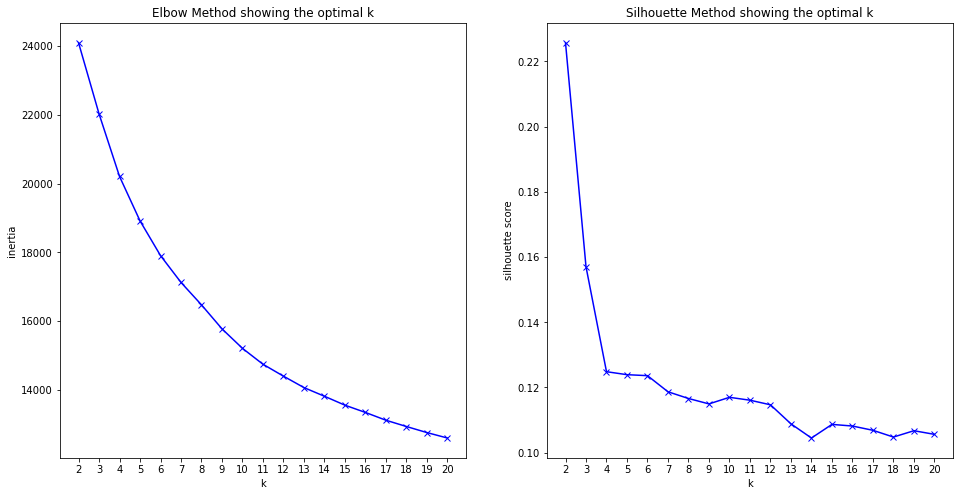

In [37]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=0,
                    verbose=1) #see the progress
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

In [108]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 

In [109]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [110]:
best_model_1 = load("kmeans_9.pickle")

In [111]:
model_1=best_model_1.predict(X_scaled_df) 
pd.Series(model_1).value_counts().sort_index()

0    272
1    412
2    559
3     34
4    349
5    295
6    102
7     48
8    260
dtype: int64

In [112]:
X["cluster_9"] = model_1
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,cluster_9
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,5,4
3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947,0,1
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,3,5
0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690,5,4
3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,5,4


In [113]:
best_model_2 = load("kmeans_14.pickle")

In [114]:
model_2=best_model_2.predict(X_scaled_df) 
pd.Series(model_2).value_counts().sort_index()

0     147
1     243
2     180
3     244
4     168
5     194
6      30
7     207
8      85
9     245
10    210
11     50
12    243
13     85
dtype: int64

In [115]:
X["cluster_14"] = model_2
X.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,cluster_9,cluster_14
2L21CMOOqvrimKXqLIpTuX,0.842,0.681,8,-6.022,1,0.0492,0.7550,0.000062,0.283,0.602,91.958,226440,5,1,0
0nYiryEA1YyZWpbIxKtStQ,0.743,0.666,0,-5.466,0,0.0581,0.3080,0.000000,0.114,0.691,149.901,205359,3,2,2
1vFWBHNjJAPoeWcBOJk9Gp,0.658,0.742,8,-6.170,1,0.1200,0.0434,0.000000,0.246,0.798,171.939,191263,0,1,5
0KRAQpoakCf6ngwMTZIwfJ,0.547,0.800,5,-3.133,1,0.0345,0.0172,0.806000,0.142,0.307,157.081,132441,6,7,11
6k5DKQMC96daK6fSvAxdQv,0.752,0.935,11,-6.263,1,0.2030,0.0742,0.035200,0.081,0.310,126.022,155677,0,1,9


In [116]:
X["hot_or_not"] = "H"



In [117]:
X.loc[97:, 'hot_or_not'] = 'N'  

/var/folders/s6/37bcs8j95w30c53jbkmzmjnh0000gn/T/ipykernel_20329/2374670146.py:1: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  X.loc[97:, 'hot_or_not'] = 'N'


In [119]:
X.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,cluster_9,cluster_14,hot_or_not
0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,5,4,1,H
3OHfY25tqY28d16oZczHc8,0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169000,0.1610,0.430,88.993,153947,0,1,9,H
2dHHgzDwk4BJdRwy9uXhTO,0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,3,5,12,H
0V3wPSX9ygBnCm8psDIegu,0.637,0.643,4,-6.571,1,0.0519,0.1300,0.000002,0.1420,0.533,97.008,200690,5,4,7,H
3nqQXoyQOWXiESFLlDF1hG,0.714,0.472,2,-7.375,1,0.0864,0.0130,0.000005,0.2660,0.238,131.121,156943,5,4,7,H


In [120]:
X.to_csv('df_cluster.csv')